Assignment 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df=pd.read_csv('/content/insurance.csv')

In [4]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape



(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
df.corr()

<ipython-input-10-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Univariate Analysis

<ipython-input-11-36725a16e635>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<Axes: xlabel='age', ylabel='Density'>

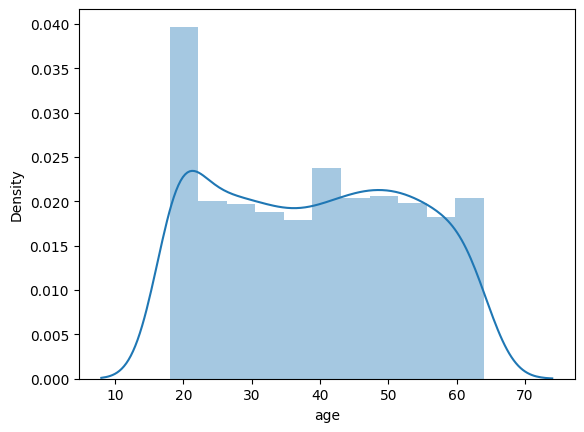

In [11]:
sns.distplot(df.age)

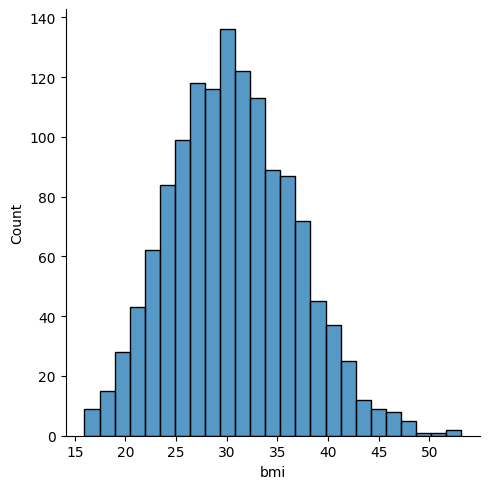

In [12]:
sns.displot(df.bmi)

([<matplotlib.patches.Wedge at 0x7db96212f8e0>,
 [Text(-0.8801026332278259, 0.6598631335250117, 'no'),
  Text(1.0401212938147033, -0.7798382487113775, 'yes')])

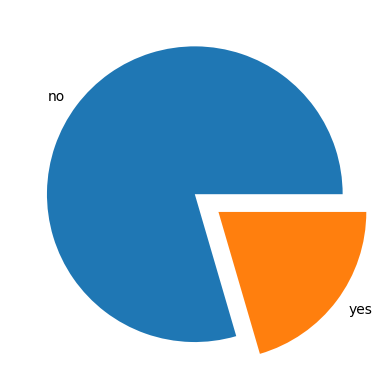

In [14]:
plt.pie(df.smoker.value_counts(),[0,0.2],labels=['no','yes'])

<Axes: ylabel='sex'>

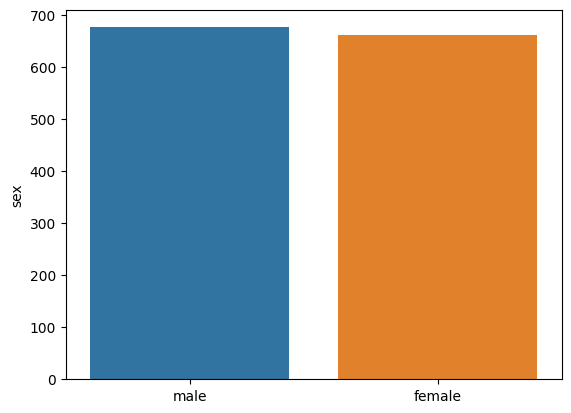

In [15]:
sns.barplot(x=df.sex.value_counts().index,y=df.sex.value_counts())

Bivariate analysis

<Axes: xlabel='age', ylabel='charges'>

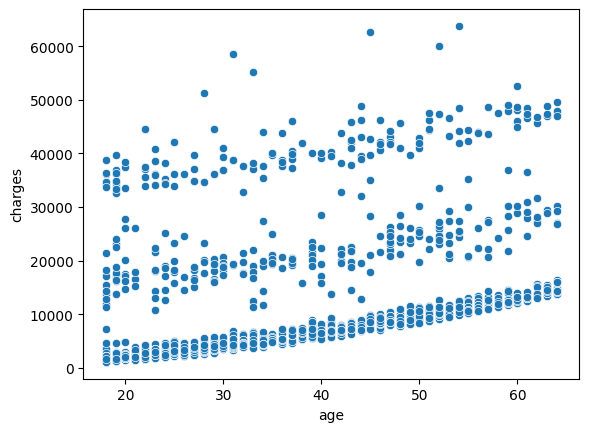

In [16]:
sns.scatterplot(x=df.age,y=df.charges)

<Axes: xlabel='age', ylabel='charges'>

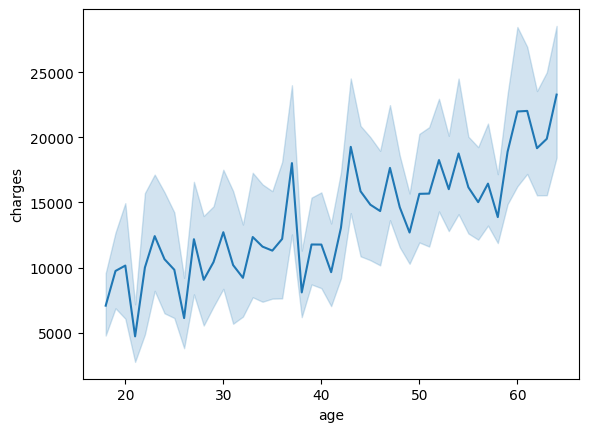

In [17]:
sns.lineplot(x=df.age,y=df.charges)

Multivariate analysis

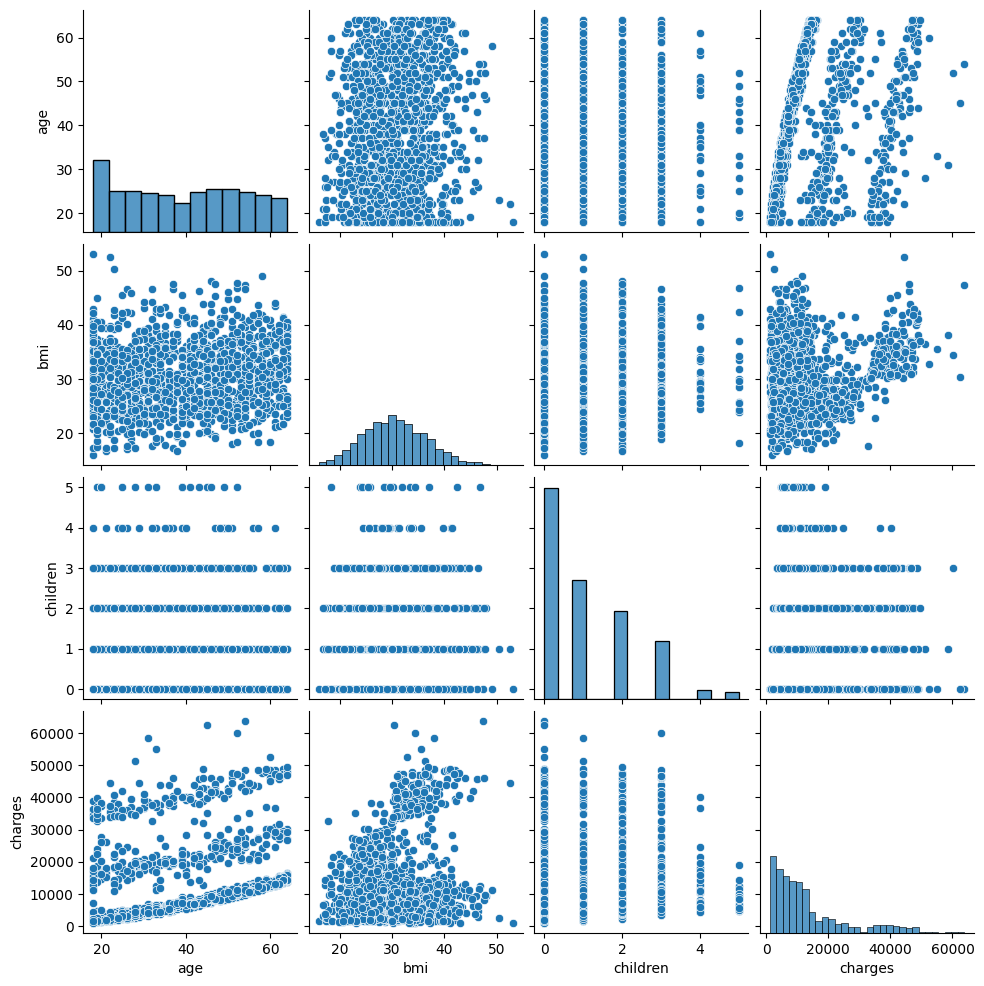

In [18]:
sns.pairplot(df)

<ipython-input-19-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

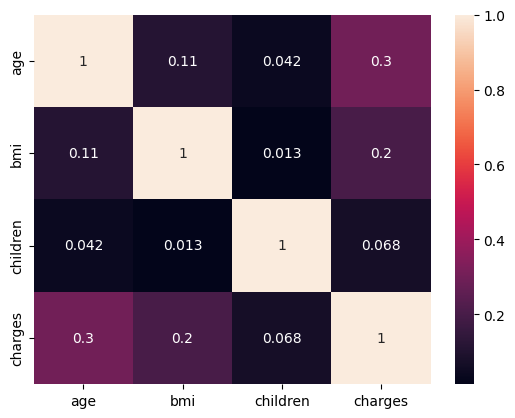

In [19]:
sns.heatmap(df.corr(),annot=True)


Replacing Outliers

In [20]:
q1=df.bmi.quantile(0.25)
q3=df.bmi.quantile(0.75)
IQR=q3-q1

In [21]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

<Axes: >

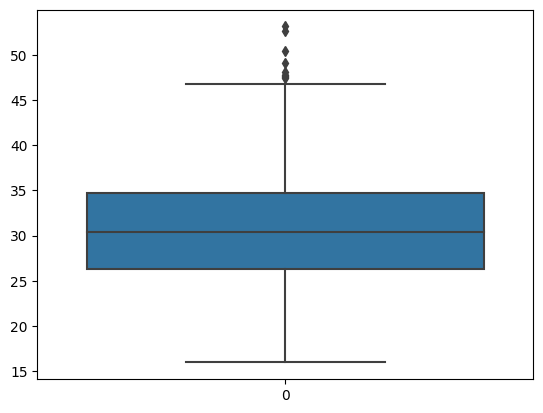

In [22]:
sns.boxplot(df.bmi)

After replacing the odd values

In [23]:
df.median()

<ipython-input-23-6d467abf240d>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

<Axes: >

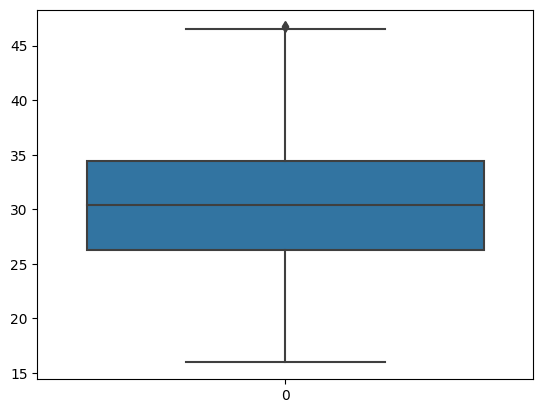

In [24]:
df['bmi']=np.where(df['bmi']>upper_limit,30.4,df['bmi'])
sns.boxplot(df.bmi)